In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = './data/'
data = pd.read_csv(path + 'copy1.csv')

In [3]:
data.columns

Index(['Region of Incident', 'Reported Date', 'Reported Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Dead and Missing', 'Number of Survivors', 'Number of Females',
       'Number of Males', 'Number of Children', 'Cause of Death',
       'Location Description', 'Information Source', 'Location Coordinates',
       'Migration Route', 'URL', 'UNSD Geographical Grouping',
       'Source Quality'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 19 columns):
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5142 non-null float64
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null object
Location Coordinates                   5332 non-null 

In [5]:
regions = data.groupby('Region of Incident').size()
regions

Region of Incident
Caribbean               59
Central America        309
Central Asia             1
East Asia                5
Europe                 249
Horn of Africa         235
Mediterranean          984
Middle East            164
North Africa          1239
North America            1
South America           28
South Asia             151
Southeast Asia          96
Sub-Saharan Africa     475
US-Mexico Border      1337
dtype: int64

In [6]:
sum_by_year = pd.pivot_table(data, index = ['Region of Incident'], values = ['Total Dead and Missing'], columns = ['Reported Year'], aggfunc = [np.sum],fill_value = 0)
# , fill_value = 'None'

print(sum_by_year.columns)
print(sum_by_year.index)
print(sum_by_year.head(2))

MultiIndex([('sum', 'Total Dead and Missing', 2014),
            ('sum', 'Total Dead and Missing', 2015),
            ('sum', 'Total Dead and Missing', 2016),
            ('sum', 'Total Dead and Missing', 2017),
            ('sum', 'Total Dead and Missing', 2018),
            ('sum', 'Total Dead and Missing', 2019)],
           names=[None, None, 'Reported Year'])
Index(['Caribbean', 'Central America', 'Central Asia', 'East Asia', 'Europe',
       'Horn of Africa', 'Mediterranean', 'Middle East', 'North Africa',
       'North America', 'South America', 'South Asia', 'Southeast Asia',
       'Sub-Saharan Africa', 'US-Mexico Border'],
      dtype='object', name='Region of Incident')
                                      sum                         
                   Total Dead and Missing                         
Reported Year                        2014 2015 2016 2017 2018 2019
Region of Incident                                                
Caribbean                              73 

In [7]:
sum_by_year.columns.names=['Sum','Total Dead and Missing','Reported Year']
x = sum_by_year.columns.get_level_values('Reported Year')
x

Int64Index([2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='Reported Year')

In [8]:
y = sum_by_year.values
y

array([[  73,   68,  115,  170,   41,   32],
       [ 116,  110,  180,   93,   77,   43],
       [   0,    0,    0,    0,   52,    0],
       [   9,   15,    3,    1,    3,    0],
       [  20,  137,   63,   97,  116,    9],
       [ 265,  135,  235,  173,  274,   70],
       [3283, 4054, 5143, 3139, 2299,  311],
       [  41,   14,  100,   98,  145,    8],
       [  90,  825, 1504, 1013,  567,   28],
       [   0,    0,    0,    1,    0,    0],
       [   0,    2,   33,    0,   30,   27],
       [   2,   22,   14,  221,   27,    0],
       [ 814,  789,  187,  301,  102,   10],
       [ 268,   74,   92,  555,  560,    0],
       [ 306,  339,  401,  417,  441,   60]], dtype=int64)

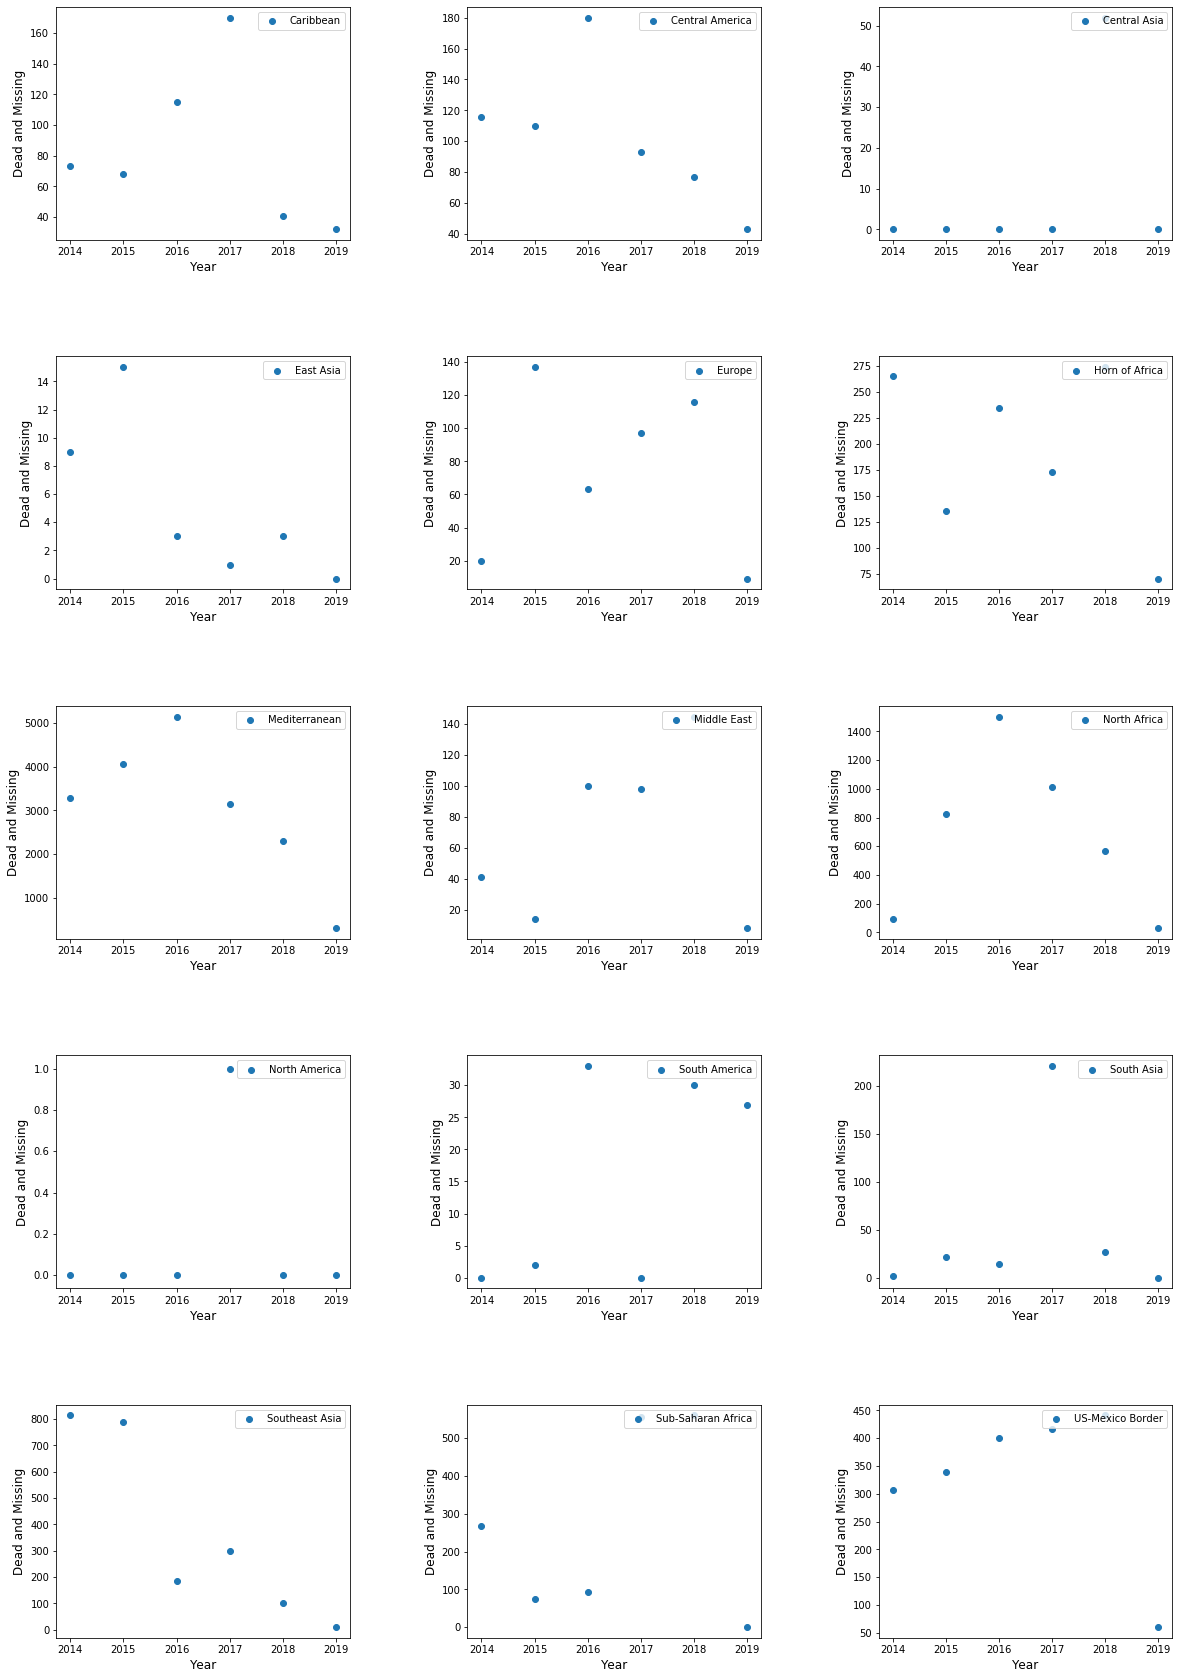

In [9]:
fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
# distance between plots

n = 1
i = 0
for region in regions.index:
    ax = fig.add_subplot(5,3,n) 
    # 5rows, 3columns, No.n
    ax.scatter(x,y[i])
    ax.set_xlabel('Year',fontsize = 12)
    ax.set_ylabel('Dead and Missing',fontsize = 12)
    ax.legend([region],loc = 'upper right')
    n += 1
    i += 1

plt.show()